# Examples and Exercises from Think Stats, 2nd Edition¶
http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

### Based on the results in this chapter, suppose we are trying to summarize what we learned about
#### 2.1) Whether first babies arrive late.
#### 2.4) Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others.

In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

import thinkstats2

# thinkplot is a wrapper for matplotlib that provides functions that work with the objects in thinkstats2.
import thinkplot

First, I'll load the data from the pregnancy file and select the records for live births.

In [2]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

From live births, we can select first babies and others using birthord, then compute histograms of pregnancy length for the two groups.

In [3]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

We can use width and align to plot two histograms side-by-side.The histogram plots values between 27 and 46 weeks only. The histogram is not the best choice for comparing two distributions. In the below example there are fewer "first babies" than "others" so the difference is due to the sample sizes.

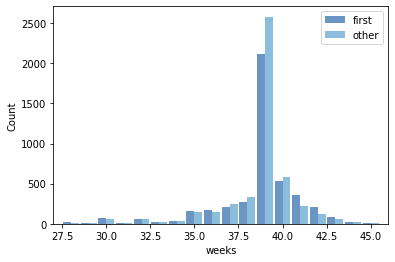

In [4]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

Here's are the mean pregnancy lengths for first babies and others. From all live births the mean pregnancy length of first child is 38.60 weeks. While that of others is 38.52. The difference is 0.08 weeks which turns out to be 13.44 hours. Also as a fraction of a typical pregnancy length (39 weeks), this difference is 0.2%. So we can conclude that this difference in pregnancy length is not significant to be considered with this sample size.

In [5]:
firsts.prglngth.mean(), others.prglngth.mean()

(38.60095173351461, 38.52291446673706)

Here is the difference in weeks given below

In [24]:
firsts.prglngth.mean() - others.prglngth.mean()

0.07803726677754952

This functon computes the Cohen effect size, which is the difference in means expressed in number of standard deviations:


In [6]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

Another way to convey the size of the effect is to compare the difference between groups to the variability within groups. Compute the Cohen effect size for the difference in pregnancy length for first babies and others. In this example the difference in means is 0.029 standard deviations which is very small. So with this we can conclude that the question whether first babies arrive late could not be proved to be true.

In [16]:
CohenEffectSize(firsts.prglngth, others.prglngth)

0.028879044654449883

# Exercises
Using the variable totalwgt_lb, we will investigate whether first babies are lighter or heavier than others.

Compute Cohen’s effect size to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

In [18]:
firsts.totalwgt_lb.mean(), others.totalwgt_lb.mean()

(7.201094430437772, 7.325855614973262)

In [19]:
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072602

This Cohen's effect size is not significantly greater than the difference than the pregnancy lengths for first time and others. Also we saw that the mean weight is not much different. So we can conclude that the hypothesis that first babies are lighter than others is not true. 